# Agniva Roy Sparks Foundation Task 3

In [1]:
#importing the necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#reading the dataset
df=pd.read_csv('iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.shape

(150, 6)

 Our dataset has 150 rows and 6 columns

In [4]:
#We are removing the column named id as it gives us no valuable information
df=df.drop(["Id"],axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
#We are removing the cm from the column names of the features
df.columns="SepalLength SepalWidth PetalLength PetalWidth Species".split(" ")
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [7]:
X.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
y.value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

We have 50 instances of each of the 3 classes, hence our dataset is balanced

<AxesSubplot:xlabel='Species', ylabel='SepalLength'>

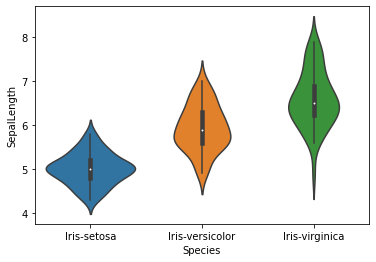

In [9]:
#Violinplot for sepal length
sns.violinplot(y="SepalLength",x="Species",data=df)

<AxesSubplot:xlabel='Species', ylabel='SepalWidth'>

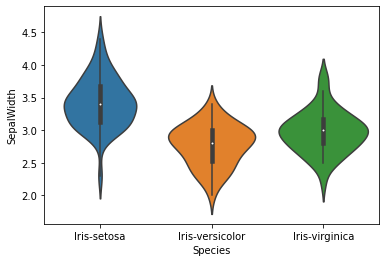

In [10]:
#Violinplot for sepalwidth
sns.violinplot(y="SepalWidth",x="Species",data=df)

<AxesSubplot:xlabel='Species', ylabel='PetalLength'>

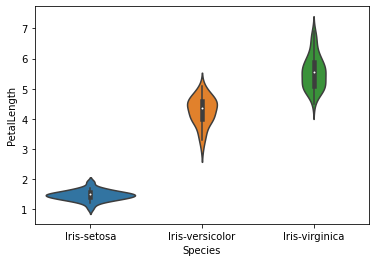

In [11]:
#Violinplot for petal length
sns.violinplot(y="PetalLength",x="Species",data=df)

<AxesSubplot:xlabel='Species', ylabel='PetalWidth'>

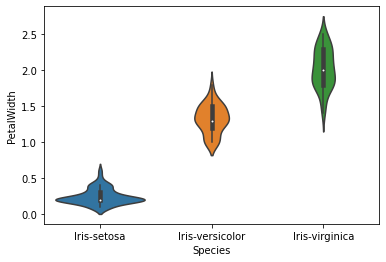

In [12]:
##Violinplot for petal width
sns.violinplot(y="PetalWidth",x="Species",data=df)

We are not doing any data preprocessing as decision tree isnt much affected by outliers or how data is distributed

In [13]:
#We are splitting the dataset into training set and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y)

In [14]:
#We are importing decision tree classifier and classification report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

In [15]:
#This will help us to visualize the tree
from sklearn import tree

In [16]:
def tree_display(model):
    """This function will display the tree"""
    plt.figure(figsize=(15,10))
    tree.plot_tree(model,feature_names=X.columns,class_names=["Setosa","Versicolor","Virginica"],filled=True)
    plt.show()
def score(model):
    """This function will display the accuracy metrics and the confusion matrix"""
    print("METRICS")
    print(f"Training accuracy is {model.score(X_train,y_train)}")
    print(classification_report(y_test,model.predict(X_test)))
    cm=confusion_matrix(y_test,model.predict(X_test),labels=model.classes_)
    disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
    disp.plot()

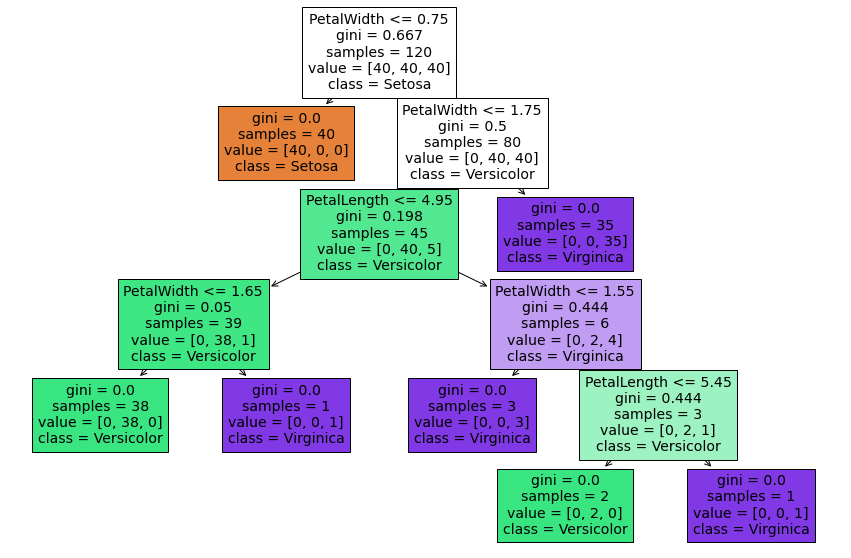

METRICS
Training accuracy is 1.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



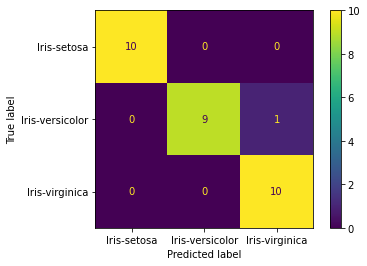

In [17]:
model=DecisionTreeClassifier()
model.fit(X_train,y_train)
tree_display(model)
score(model)

Precision-Out of all that we predicted, how many were actually correctly predicted.
Recall-Out of all the actual values, how many were correctly predicted
f1-score is the harmonic mean of precision and recall. 
Since this dataset is prefectly balanced, the macro average and the weighted averages will be equal

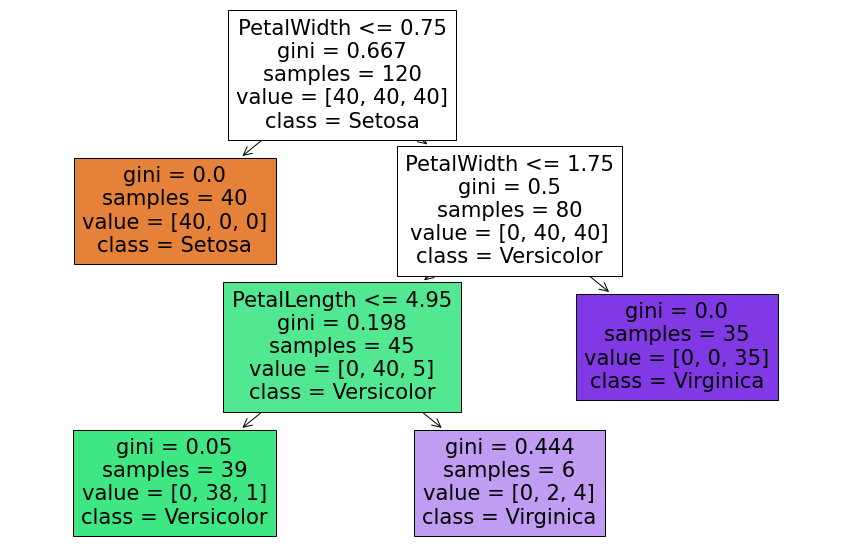

METRICS
Training accuracy is 0.975
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



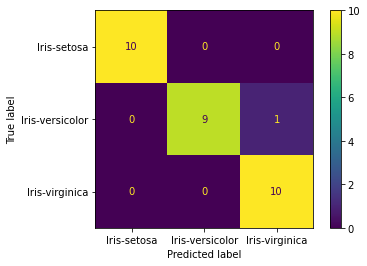

In [18]:
model=DecisionTreeClassifier(max_depth=3)
model.fit(X_train,y_train)
tree_display(model)
score(model)

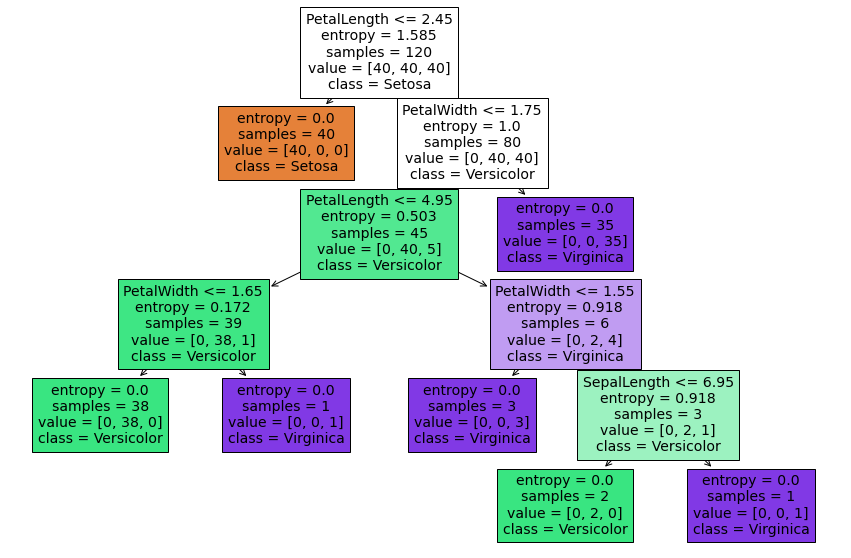

METRICS
Training accuracy is 1.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



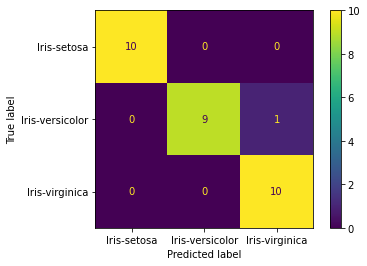

In [19]:
model=DecisionTreeClassifier(criterion="entropy")
model.fit(X_train,y_train)
tree_display(model)
score(model)

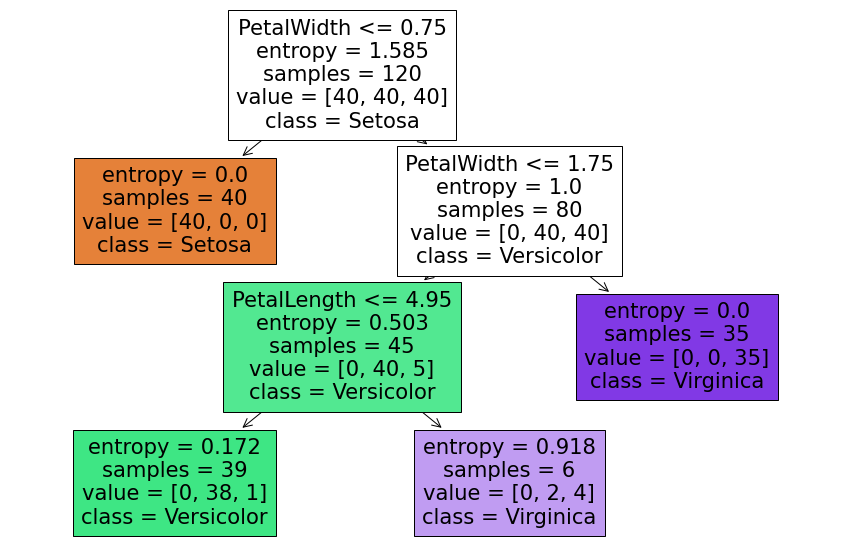

METRICS
Training accuracy is 0.975
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



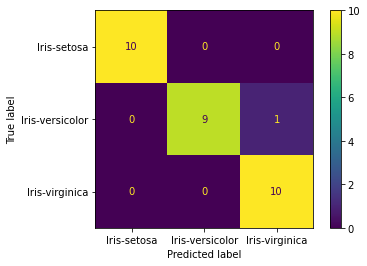

In [20]:
model=DecisionTreeClassifier(criterion="entropy",max_depth=3)
model.fit(X_train,y_train)
tree_display(model)
score(model)